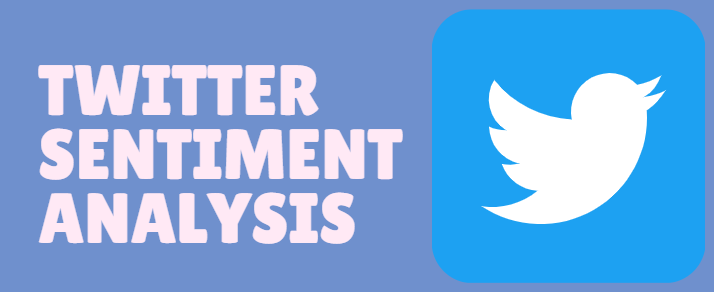

In [1]:
import requests
import pandas as pd
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
df = pd.read_csv('/content/sample_data/NewSentiment.csv', header=None)

FileNotFoundError: ignored

In [ ]:
df

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
9996,0,1550730633,Sat Apr 18 07:05:23 PDT 2009,NO_QUERY,gia_revenge,stupid dvds stuffing up the good bits in jaws.
9997,0,1550731192,Sat Apr 18 07:05:29 PDT 2009,NO_QUERY,matmurray,@Dandy_Sephy No. Only close friends and family...
9998,0,1550731281,Sat Apr 18 07:05:30 PDT 2009,NO_QUERY,lexabuckets,CRAP! After looking when I last tweeted... WHY...
9999,0,1550731500,Sat Apr 18 07:05:32 PDT 2009,NO_QUERY,AmberKarley,Its Another Rainboot day


In [ ]:
columns=['id','ID',"Date&Time",'query','Author','tweet']
df.columns=columns

In [ ]:
df

,id,ID,Date&Time,query,Author,tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
9996,0,1550730633,Sat Apr 18 07:05:23 PDT 2009,NO_QUERY,gia_revenge,stupid dvds stuffing up the good bits in jaws.
9997,0,1550731192,Sat Apr 18 07:05:29 PDT 2009,NO_QUERY,matmurray,@Dandy_Sephy No. Only close friends and family...
9998,0,1550731281,Sat Apr 18 07:05:30 PDT 2009,NO_QUERY,lexabuckets,CRAP! After looking when I last tweeted... WHY...
9999,0,1550731500,Sat Apr 18 07:05:32 PDT 2009,NO_QUERY,AmberKarley,Its Another Rainboot day


## **1. Data Preprocessing**

In [ ]:
df=df[['Author','tweet']]
df

,Author,tweet
0,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,scotthamilton,is upset that he can't update his Facebook by ...
2,mattycus,@Kenichan I dived many times for the ball. Man...
3,ElleCTF,my whole body feels itchy and like its on fire
4,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...
9996,gia_revenge,stupid dvds stuffing up the good bits in jaws.
9997,matmurray,@Dandy_Sephy No. Only close friends and family...
9998,lexabuckets,CRAP! After looking when I last tweeted... WHY...
9999,AmberKarley,Its Another Rainboot day


In [ ]:
df.columns

Index(['Author', 'tweet'], dtype='object')

## **Cleaning the tweets**

In [ ]:
df['tweet']

0        @switchfoot http://twitpic.com/2y1zl - Awww, t...
1        is upset that he can't update his Facebook by ...
2        @Kenichan I dived many times for the ball. Man...
3          my whole body feels itchy and like its on fire 
4        @nationwideclass no, it's not behaving at all....
                               ...                        
9996       stupid dvds stuffing up the good bits in jaws. 
9997     @Dandy_Sephy No. Only close friends and family...
9998     CRAP! After looking when I last tweeted... WHY...
9999                             Its Another Rainboot day 
10000    I think there's a problem with the ISP in this...
Name: tweet, Length: 10001, dtype: object

In [ ]:
import re

In [ ]:



def cleantweet(text):
    text = text.strip()  # Remove leading and trailing spaces
    text = re.sub(r'@[A-Za-z0-9]+', '', text)  # Remove mentions
    text = re.sub(r'#', '', text)  # Remove the # symbol
    text = re.sub(r'RT[\s]+', '', text)  # Remove RT
    text = re.sub(r'https?:\/\/\S+', '', text)  # Remove hyperlinks
    text = re.sub(r'-', '', text)  # Remove '-'
    text = re.sub(r':[A-Za-z0-9]+', '', text)  # Remove emojis like ':D'
    return text



df['tweet']=df['tweet'].apply(cleantweet)


<ipython-input-13-0c1fd7a70e6b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tweet']=df['tweet'].apply(cleantweet)


In [ ]:
df.iloc[2].tweet

' I dived many times for the ball. Managed to save 50%  The rest go out of bounds'

**Now lets see what is polarity and subjectivity of a text**



Subjectivity and polarity are two common measures used in natural language processing (NLP) to analyze and quantify the sentiment or emotional tone of a text.

Polarity:

Polarity refers to the sentiment or emotional tone expressed in a piece of text, which can be positive, negative, or neutral.
It is often quantified on a scale, where positive sentiment is represented as a positive value (e.g., +1 for very positive), negative sentiment as a negative value (e.g., -1 for very negative), and neutral sentiment as zero.
Polarity analysis helps determine whether a text conveys a positive, negative, or neutral sentiment.
Subjectivity:

Subjectivity measures how subjective or objective a piece of text is. It indicates whether the text expresses opinions, emotions, or personal feelings, as opposed to being purely factual.
Subjectivity is often quantified on a scale, where a higher value represents a more subjective text, and a lower value indicates a more objective or factual text.
Texts with high subjectivity may contain personal opinions, emotional language, or subjective judgments, while texts with low subjectivity tend to be more factual and objective.

In [ ]:
def subjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def polarity(text):
  return TextBlob(text).sentiment.polarity


df['Subjectivity']=df['tweet'].apply(subjectivity)
df['Polarity']=df['tweet'].apply(polarity)



<ipython-input-15-bf28a49d0e8b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Subjectivity']=df['tweet'].apply(subjectivity)
<ipython-input-15-bf28a49d0e8b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Polarity']=df['tweet'].apply(polarity)


In [ ]:
df

,Author,tweet,Subjectivity,Polarity
0,_TheSpecialOne_,"Awww, that's a bummer. You shoulda got Dav...",0.633333,0.216667
1,scotthamilton,is upset that he can't update his Facebook by ...,0.000000,0.000000
2,mattycus,I dived many times for the ball. Managed to s...,0.500000,0.500000
3,ElleCTF,my whole body feels itchy and like its on fire,0.400000,0.200000
4,Karoli,"no, it's not behaving at all. i'm mad. why am...",1.000000,-0.625000
...,...,...,...,...
9996,gia_revenge,stupid dvds stuffing up the good bits in jaws.,0.800000,-0.050000
9997,matmurray,_Sephy No. Only close friends and family I'm a...,0.966667,-0.200000
9998,lexabuckets,CRAP! After looking when I last tweeted... WHY...,0.388889,-0.291667
9999,AmberKarley,Its Another Rainboot day,0.000000,0.000000


<Axes: xlabel='Polarity', ylabel='Subjectivity'>

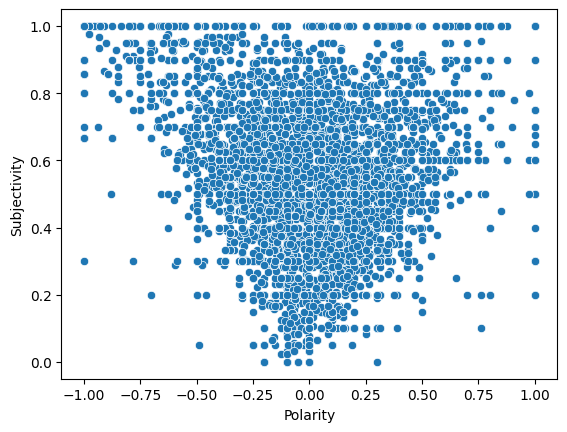

In [ ]:
sns.scatterplot(x=df['Polarity'],y=df['Subjectivity'])




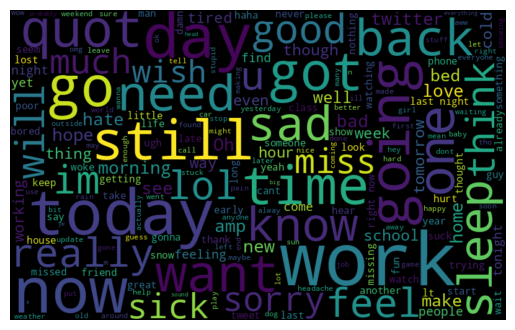

In [ ]:
#plotting the word clouds

allwords=' '.join([twts for twts in df['tweet']])
wordcloud=WordCloud(width=800,height=500,random_state=21,max_font_size=119).generate(allwords)
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()


In [ ]:
def getAnalysis(score):
  if score<0:
    return 'Negative'
  elif score ==0:
    return "Neutral"
  elif score > 0:
    return "positive"


df["Analysis"]=df['Polarity'].apply(getAnalysis)


<ipython-input-19-0be4c55b6645>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Analysis"]=df['Polarity'].apply(getAnalysis)


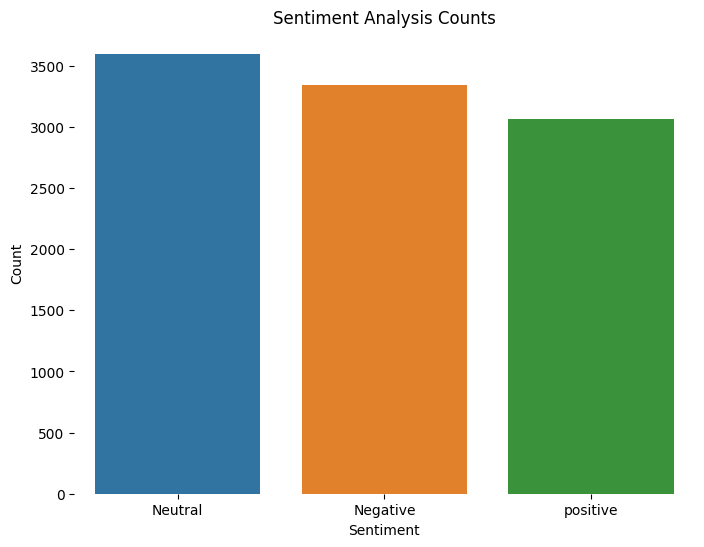

In [ ]:
category_counts = df['Analysis'].value_counts()


# Create a bar plot to visualize the counts
plt.figure(figsize=(8, 6))
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Analysis Counts')
sns.despine(left=True, bottom=True)
plt.gca().patch.set_facecolor('none')
plt.show()

In [ ]:
df

,Author,tweet,Subjectivity,Polarity,Analysis
0,_TheSpecialOne_,"Awww, that's a bummer. You shoulda got Dav...",0.633333,0.216667,positive
1,scotthamilton,is upset that he can't update his Facebook by ...,0.000000,0.000000,Neutral
2,mattycus,I dived many times for the ball. Managed to s...,0.500000,0.500000,positive
3,ElleCTF,my whole body feels itchy and like its on fire,0.400000,0.200000,positive
4,Karoli,"no, it's not behaving at all. i'm mad. why am...",1.000000,-0.625000,Negative
...,...,...,...,...,...
9996,gia_revenge,stupid dvds stuffing up the good bits in jaws.,0.800000,-0.050000,Negative
9997,matmurray,_Sephy No. Only close friends and family I'm a...,0.966667,-0.200000,Negative
9998,lexabuckets,CRAP! After looking when I last tweeted... WHY...,0.388889,-0.291667,Negative
9999,AmberKarley,Its Another Rainboot day,0.000000,0.000000,Neutral


In [ ]:
df.sort_values(by='Polarity').iloc[2]

Author                                             mmmelissa
tweet           has a huuuge headache! omg I feel like crap!
Subjectivity                                             0.8
Polarity                                                -1.0
Analysis                                            Negative
Name: 499, dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Author        10001 non-null  object 
 1   tweet         10001 non-null  object 
 2   Subjectivity  10001 non-null  float64
 3   Polarity      10001 non-null  float64
 4   Analysis      10001 non-null  object 
dtypes: float64(2), object(3)
memory usage: 390.8+ KB


In [ ]:
df.describe()

,Subjectivity,Polarity
count,10001.000000,10001.000000
mean,0.394458,-0.024607
std,0.346293,0.331291
min,0.000000,-1.000000
25%,0.000000,-0.155556
50%,0.400000,0.000000
75%,0.666667,0.100000
max,1.000000,1.000000


In [ ]:
df.drop(columns='Author',inplace=True)

<ipython-input-25-2235209dec86>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns='Author',inplace=True)


In [ ]:
df

,tweet,Subjectivity,Polarity,Analysis
0,"Awww, that's a bummer. You shoulda got Dav...",0.633333,0.216667,positive
1,is upset that he can't update his Facebook by ...,0.000000,0.000000,Neutral
2,I dived many times for the ball. Managed to s...,0.500000,0.500000,positive
3,my whole body feels itchy and like its on fire,0.400000,0.200000,positive
4,"no, it's not behaving at all. i'm mad. why am...",1.000000,-0.625000,Negative
...,...,...,...,...
9996,stupid dvds stuffing up the good bits in jaws.,0.800000,-0.050000,Negative
9997,_Sephy No. Only close friends and family I'm a...,0.966667,-0.200000,Negative
9998,CRAP! After looking when I last tweeted... WHY...,0.388889,-0.291667,Negative
9999,Its Another Rainboot day,0.000000,0.000000,Neutral


## **Model Evaluation **

## **Applying Regression model on Polarity**

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score,classification_report,confusion_matrix




X = df['tweet']
y = df['Polarity']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a TF-IDF vectorizer to convert text data into numerical features
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')  # You can adjust max_features and other parameters

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the testing data
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Create and train a linear regression model
model = LinearRegression()
model.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_tfidf)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared (R2) Score: {r2}")

# pickle.dump(tfidf_vectorizer,'tfidf_vectorizer',)
pickle.dump(tfidf_vectorizer,open('/content/sample_data/vector.pkl','wb'))

Mean Squared Error: 0.05230150198559767
R-squared (R2) Score: 0.5278580829904728


## **Applying Classification algo on Analysis**

# **1. DecisionTreeClassifier**

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()

In [ ]:
x=df['tweet']
y=df['Analysis']

X_train, X_test, y_train, y_test1 = train_test_split(x, y, test_size=0.2, random_state=42)

# Create a TF-IDF vectorizer to convert text data into numerical features
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')  # You can adjust max_features and other parameters

# Fit and transform the training data
X_train = vectorizer.fit_transform(X_train)

# Transform the testing data
X_test = vectorizer.transform(X_test)



In [ ]:
clf.fit(X_train,y_train)
y_pred1=clf.predict(X_test)


In [ ]:
print(accuracy_score(y_pred1,y_test1))

0.7406296851574213


## **Classification Report**

In [ ]:
print(classification_report(y_test1,y_pred1))

              precision    recall  f1-score   support

    Negative       0.76      0.70      0.73       671
     Neutral       0.74      0.82      0.78       701
    positive       0.72      0.69      0.70       629

    accuracy                           0.74      2001
   macro avg       0.74      0.74      0.74      2001
weighted avg       0.74      0.74      0.74      2001



In [ ]:
print(confusion_matrix(y_test1,y_pred1))

[[473  89 109]
 [ 61 578  62]
 [ 89 109 431]]


# **2. RANDOM FOREST**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred2=rf.predict(X_test)
print(accuracy_score(y_test1,y_pred2))

0.791104447776112


In [ ]:
print(classification_report(y_test1,y_pred2))
y_pred2

              precision    recall  f1-score   support

    Negative       0.85      0.74      0.79       671
     Neutral       0.74      0.92      0.82       701
    positive       0.81      0.71      0.76       629

    accuracy                           0.79      2001
   macro avg       0.80      0.79      0.79      2001
weighted avg       0.80      0.79      0.79      2001



array(['Neutral', 'Neutral', 'Negative', ..., 'Negative', 'Negative',
       'Neutral'], dtype=object)

## Sample test for Polarity (Regression)

In [ ]:
sample_text = "This is a test text with some positive words."  # Replace with your sample text


sample_text_tfidf = tfidf_vectorizer.transform([sample_text])

# Predict the polarity value for the sample text
sample_polarity_prediction = model.predict(sample_text_tfidf)
if sample_polarity_prediction == 0:
    analysis = "Neutral"
elif sample_polarity_prediction > 0:
    analysis = "Positive"
else:
    analysis = "Negative"

print(f"Polarity Prediction for Sample Text: {sample_polarity_prediction[0]}")
print(f"Analysis: {analysis}")

Polarity Prediction for Sample Text: 0.07010719304077986
Analysis: Positive


## Sample test for Analysis (Classification)

In [ ]:
sample='I hate this job!'

vect=vectorizer.transform([sample])
predict1=clf.predict(vect)
predict2=rf.predict(vect)

print(f'DecisiontreeClassifier results give {predict1}')
print(f'RandomForestClassifier results give {predict2}')

DecisiontreeClassifier results give ['Negative']
RandomForestClassifier results give ['Negative']


In [ ]:
import pickle

In [ ]:
pickle.dump(model,open('/content/sample_data/sentiment.pkl','wb'))